In [1]:
import math
import random
from game import State

In [2]:
State.gap

<function game.State.gap(self)>

In [3]:
from mcts100 import mcts100_action 
from mcts1000 import mcts1000_action
from game import random_action

In [4]:
# プレイアウト 今の局面からゲーム終了まで戦うシミュレーションするやつ
def draw_playout(state):
    if state.is_draw():
         return 1
    if state.is_draw2():
         return 0.9
    if state.is_draw3():
         return 0.7
    if state.is_draw4():
         return 0.5
    if state.is_draw5():
         return 0.3
    if state.is_draw6():
         return 0

  # 次の状態の状態価値
    return draw_playout(state.next(random_action(state)))

def playout(state):
    if state.is_lose() :
        return -1
    if state.is_draw():
        return 0
        # 負けは -1、引き分けは 0
    return -playout(state.next(random_action(state)))

In [5]:
# モンテカルロ木探索で手を選ぶ
# 手の選び方、毎回選ぶときに引き分けを狙いに行く、ちょっとだけ勝ちも狙った方が引き分けしやすい？？
def draw_mcts_action(state):
    
  # モンテカルロ木探索
    class Node:
        
        # 初期化
        def __init__(self,state):
            self.state = state # 状態
            #self.draw_w#奇数偶数の深さで考える
            #self.draw_n
            self.w = 0 # 累計価値
            self.n = 0 # 試行回数
            self.child_nodes = None # 子ノード群

        def evaluate(self):
            
            # ゲーム終了
            if self.state.is_done():
                if state.is_first_player():
                    
                    # 勝敗結果で価値を取得、引き分けに近いほど価値が高い、
                    # これにより作られる木が引き分けを狙う木になる、はず、、、
                    
                    
                    #更新時に自分と相手のポイントは別になるようにしたい
                    #これはまじで変えとこうどうにかしないと怒られる

#                     if state.is_draw():
#                         value = 1
                    if state.is_draw2():
                        value = 0.9
                    if state.is_draw3():
                        value = 0.7
                    if state.is_draw4():
                        value = 0.5
                    if state.is_draw5():
                        value = 0.3
                    else:
                        value = 0
                # 後攻は普通に勝ったらポイントゲットとなる
                else:
                    # 勝敗結果で価値を取得
                    value = -1 if self.state.is_lose() else 0 # 負けは -1、引き分けは 0


                    
#                 if state.is_draw6():
               
#                     value = 0
                #value = -1 if self.state.is_lose() else 1 # 負けは -1、引き分けは 0

            # 累計価値を試行回数の更新
                self.w += value
                self.n += 1
                return value
          #子ノードが存在しないとき
            if not self.child_nodes:
                if state.is_first_player():
                    value = draw_playout(self.state)
                else:
                    value = playout(self.state)

            # 累計価値と試行回数の更新
                self.w += value
                self.n += 1

                # 子ノードの展開
                if self.n == 10:

                    self.expand()
                return value

          # 子ノードが存在するとき
            else:
                # UCB1が最大の子ノードの評価で価値を取得
                if state.is_first_player():  
                    value = self.next_child_node().evaluate()
                else:
                    value = -self.next_child_node().evaluate()
                self.w += value
                self.n += 1
                return value
            
        # 子ノードの展開
        def expand(self):
            legal_actions = self.state.legal_actions()
            self.child_nodes = []
            for action in legal_actions:
                self.child_nodes.append(Node(self.state.next(action)))

        # UCB1が最大の子ノードの取得
        # ここでの最大値を持つノードが次の手に選ばれる、今回はそうではなく引き分けを狙えそうな
        # 物を選ぶためargmaxにはならない
        # どうにかしてここが平均くらいの手を選ぶようにして展開するノードが引き分けを狙えるノードにしたい
        
        def next_child_node(self):
            for child_node in self.child_nodes:
                if child_node.n == 0:
                    return child_node

          # UCB1の計算
            t = 0
            for c in self.child_nodes:
                t += c.n
            ucb1_values = []
            for child_node in self.child_nodes:
                
                if state.is_first_player():
                    ucb1_values.append(child_node.w/child_node.n+(2*math.log(t)/child_node.n)**0.5)
                else:
                    ucb1_values.append(-child_node.w/child_node.n+(2*math.log(t)/child_node.n)**0.5)

          # UCB1が最大の子ノードを返す
            return self.child_nodes[argmax(ucb1_values)] 
        
          # そうではなく最も0に近いノードを選べばいいのではないだろうか
            #return self.child_nodes[select0(ucb1_values)]


        # 現在の局面のノードの作成
    root_node = Node(state)
    root_node.expand()

      # n回のシミュレーションを実行　この数によって強さが変動する
    for _ in range(1000):
        root_node.evaluate()

      # 試行回数の最大値を持つ行動を返す
    legal_actions = state.legal_actions()
    n_list = []
    for c in root_node.child_nodes:
        n_list.append(c.n)
    return legal_actions[argmax(n_list)]

In [6]:
#ランダムに手を打つやつ
def random_action(state):
    legal_actions = state.legal_actions()
    return legal_actions[random.randint(0,len(legal_actions)-1)]

In [7]:
# 最大値のインデックスを返す
def argmax(collection,key=None):
    return collection.index(max(collection))

In [8]:
import matplotlib.pyplot as plt
import random 
import numpy as np


# 原始モンテカルロ探索とランダムおよびアルファベータ法の対戦

# パラメータ
EP_GAME_COUNT = 100  # 1評価当たりのゲーム数

# 先手プレイヤーのポイント
def first_player_point(ended_state):
  # 1:先手勝利、0:先手敗北または引分け
    if ended_state.is_lose():
        return 0 if ended_state.is_first_player() else 1
    return 0

#先手プレイヤーの得点差

def first_dif_point(ended_state):
  # 1:先手勝利、0:先手敗北または引分け
    if state.is_done():
        state.gap()
    return gap



# 1ゲームの実行
def play(next_actions):
  # 状態の生成
    state = State()
    

  # ゲーム終了までループ
    while True:
    # ゲーム終了時
        if state.is_done():
            gap = state.gap()
            print(abs(gap))
            break

    # 行動の取得
        next_action = next_actions[0] if state.is_first_player() else next_actions[1]
        action = next_action(state)

    # 次の状態の取得
        state = state.next(action)

  # 先手プレイヤーのポイントを返す
    return first_player_point(state)#数字はそのまま勝った回数となっている



# def gapmake(gap):
#     gap_list = []
#     gap_list.append(gap)
#     return gap_list
    


# 任意のアルゴリズムの評価
def evaluate_algorithm_of(label,next_actions):
  # 複数回の対戦を繰り返す
    total_point = 0
    wp_list = []
    for i in range(EP_GAME_COUNT):
    # 1ゲームの実行
    # 先攻後攻毎回プログラムを切り替える
    # 
        if i%2 == 0:
            total_point += play(next_actions)
            # 現時点での勝率の計算
            now_average_point = total_point/(i+1)
            # 配列には毎回現時点での勝率を追加する
            wp_list.append(now_average_point*100)
            #gap = state.gap()
            #print(gap)
            # 先攻が負けた場合相手が勝ったということで１－１で０点が加算される
        else:
            total_point += 1-play(list(reversed(next_actions)))
            now_average_point = total_point/(i+1)
            wp_list.append(now_average_point*100)
            #gap = state.gap()
            #print(-1*gap)
# reversed はリストを逆にするやつ、先攻後攻入れ替えたってこと
    
    # 出力、グラフの表示
    # 最後まで毎回計算し最後にグラフの出力
        #print('\nEvaluate {}/{}'.format(i+1,EP_GAME_COUNT))
#         print(self.pieces.count(1),end="")
#         print("対",end="")
#         print(self.enemy_pieces.count(1))
    print('')

  # 平均ポイントの計算
    average_point = total_point/EP_GAME_COUNT
    #print(label.format(average_point))
    x = list(range(1,1+EP_GAME_COUNT))
    y = wp_list
    plt.title('result')
    plt.ylabel('winning parcentage')
    plt.xlabel('times')
    plt.plot(x,y,color = "red",marker = "",label = "changes")
    plt.legend()
    plt.show

    
#     #散布図
#     x = EP_GAME_COUNT
#     y = np.random.rand(10)
#     fig = plt.figure()
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(x,y)
#     ax.set_title('scatter plot')
#     ax.set_xlabel('time')
#     ax.set_ylabel('difference')
#     fig.show()



8
32
6
24
24
12
18
4
10
24
24
20
4
38
32
12
8
12
6
24
4
10
10
32
26
18
22
4
14
4
12
12
18
22
22
2
2
26
8
0
12
22
2
10
2
16
20
2
10
18
10
8
4
20
4
2
0
10
34
30
36
2
6
28
8
2
16
22
14
34
8
12
12
38
32
28
10
2
10
16
26
18
4
16
8
10
22
12
14
2
2
14
0
18
6
34
20
2
16
10



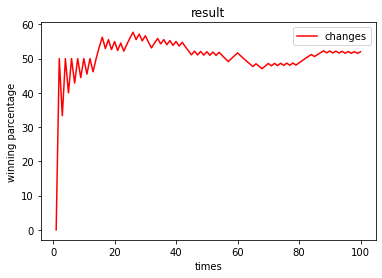

In [9]:
#VSランダム
next_actions = (random_action,random_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)

30
26
54
32
50
24
6
36
40
30
46
44
46
44
16
44
22
32
42
28
46
26
46
40
22
22
44
44
46
54
44
42
28
28
26
48
44
28
36
32
42
26
32
26
52
22
42
36
26
28
60
20
30
51
46
34
42
32
20
50
48
38
52
34
40
42
36
24
34
18
36
34
30
26
34
28
50
46
44
26
30
34
24
40
40
38
28
48
38
46
46
28
54
40
52
28
26
38
32
42



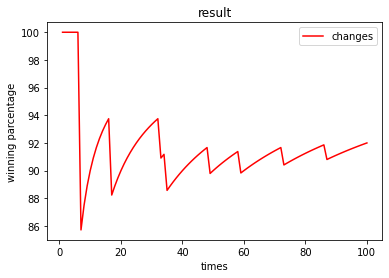

In [64]:
#確認
next_actions = (mcts1000_action,random_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)

In [65]:
from mcts500 import mcts500_action
from mcts200 import mcts200_action

42
46
38
32
12
46
29
46
40
30
38
22
44
38
34
28
28
50
28
26
56
36
44
42
50
18
28
18
22
32
48
60
44
46
26
38
24
26
30
26
44
22
56
62
36
40
36
24
14
28
28
36
58
28
32
54
36
24
38
44
64
42
20
26
42
22
42
40
14
34
34
28
36
46
50
24
42
20
26
20
4
36
50
32
32
44
22
36
32
14
24
36
24
34
44
12
36
40
52
20



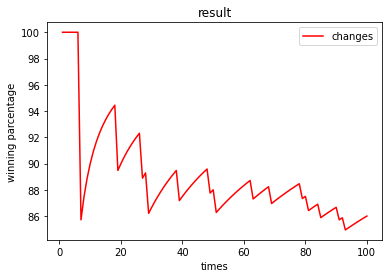

In [66]:
#確認
next_actions = (mcts500_action,random_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)

26
44
36
46
20
32
6
16
14
28
50
30
40
14
32
38
46
30
22
30
30
32
24
28
14
26
36
20
48
28
40
28
38
34
22
32
42
26
40
30
8
26
30
34
20
34
64
16
32
48
24
32
8
14
32
54
28
16
36
40
44
36
36
30
32
28
44
20
18
36
30
56
56
44
18
32
16
10
20
38
22
22
44
44
14
24
18
34
44
44
40
10
32
20
28
34
30
58
28
57



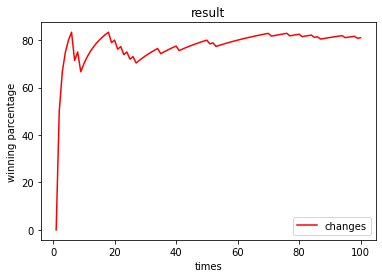

In [67]:
#確認
next_actions = (mcts200_action,random_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)

34
36
12
2
36
18
28
4
48
60
34
16
10
30
24
28
28
48
26
22
32
22
38
48
16
22
24
2
22
22
12
34
22
52
24
30
22
32
22
26
36
22
30
26
22
22
52
24
28
24
38
16
59
19
18
24
34
32
4
36
34
16
24
34
46
40
18
52
42
30
42
48
28
10
48
12
40
10
44
28
18
22
30
50
8
48
18
32
46
20
26
32
16
10
2
26
28
22
14
26



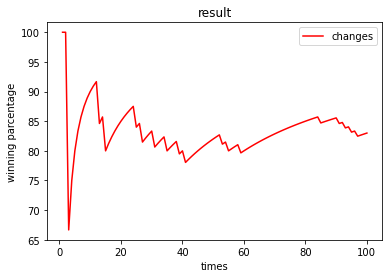

In [68]:
#確認
next_actions = (mcts100_action,random_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)
#ここまで

14
16
60
30
32
22
38
42
32
26
54
20
40
44
18
26
16
38
6
26
42
18
18
38
24
52
22
24
30
44
10
36
12
18
14
22
44
32
18
6
34
4
0
30
16
18
4
24
36
28
12
38
48
26
38
34
24
22
16
10
0
34
44
31
32
26
22
36
28
30
10
26
20
36
22
56
34
16
42
6
18
12
28
38
22
32
24
46
2
28
34
12
24
40
20
32
22
34
32
26



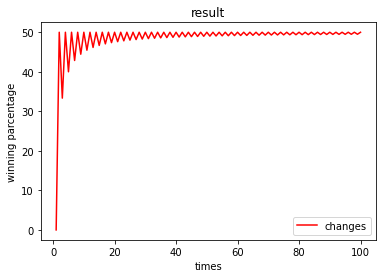

# 実行中

40
6
28
6
46
6
24
10
34
35
24
10
36
16
32
28
46
30
6
0
40
10
20
12
40
44
26
10
38
30
34
30
46
0
16
8
30
10
38
20
28
6
56
26
40
26
34
6
46
16
32
38
34
32
42
4
32
18
50
28
24
38
36
26
40
20
26
30
36
18
44
48
48
18
42
18
28
20
36
2
14
22
38
24
6
12
40
12
20
4
12
12
32
14
42
24
42
18
18
34



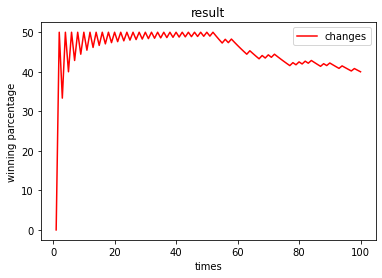

In [61]:
#VS
next_actions = (draw_mcts_action,mcts1000_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)

In [62]:
from mcts500 import mcts500_action

18
16
24
28
34
8
20
14
20
4
26
6
46
32
34
32
22
6
44
24
44
18
28
22
36
14
24
32
30
26
36
2
16
8
24
30
50
28
22
26
34
22
32
6
26
20
34
32
50
42
46
6
44
34
14
32
18
20
44
22
8
4
56
32
34
34
38
10
10
38
24
8
14
26
34
30
32
24
20
40
32
20
36
2
50
32
28
8
36
12
54
10
16
18
24
26
32
8
34
0



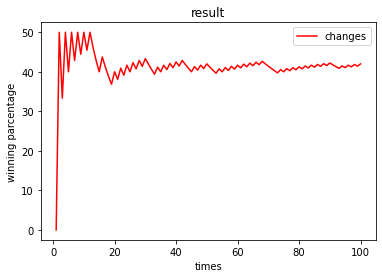

In [63]:
#VS
next_actions = (draw_mcts_action,mcts500_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)

/var/folders/jk/rwq9g1y95_x7yrxddnhm7lh80000gn/T/ipykernel_69273/3159675744.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


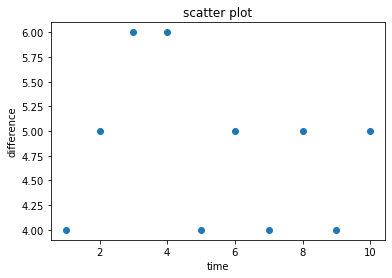

In [29]:
y = [4,5,6,6,4,5,4,5,4,5]
x = [1,2,3,4,5,6,7,8,9,10]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y)
ax.set_title('scatter plot')
ax.set_xlabel('time')
ax.set_ylabel('difference')
fig.show()

In [13]:
next_actions = (draw_mcts_action,mcts50_action)
evaluate_algorithm_of('VS_AI {:.3f}',next_actions)


VS_AI 0.070


In [14]:
next_actions = (draw_mcts_action,mcts1000_action)
evaluate_algorithm_of('VS_AI {:.3f}',next_actions)

KeyboardInterrupt: 

4
4
30
32
38
2
2
20
16
18
10
42
8
8
38
2
2
36
12
20
10
6
18
10
42
4
14
16
0
4
0
8
6
14
12
30
16
12
2
24
6
28
14
6
38
38
2
28
4
12
34
2
8
2
10
20
6
6
24
12
18
48
30
4
4
16
4
2
14
12
8
6
10
20
4
12
18
4
18
24
10
24
16
6
12
0
4
18
8
4
14
18
4
34
10
24
18
24
10
2



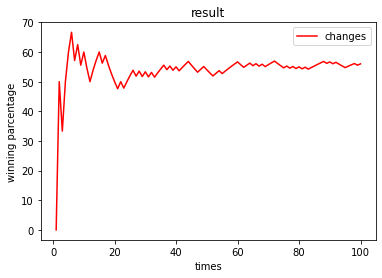

In [71]:
next_actions = (random_action,random_action)
evaluate_algorithm_of('VS_Program {:.3f}',next_actions)

In [11]:
next_actions = (draw_mcts_action,mcts50_action)
evaluate_algorithm_of('VS_AI {:.3f}',next_actions)


Evaluate 1/10
Evaluate 2/10
Evaluate 3/10
Evaluate 4/10
Evaluate 5/10
Evaluate 6/10
Evaluate 7/10
Evaluate 8/10
Evaluate 9/10
Evaluate 10/10
VS_AI 0.050


In [12]:
next_actions = (random_action,mcts5_action)
evaluate_algorithm_of('VS_AI {:.3f}',next_actions)


Evaluate 1/10
Evaluate 2/10
Evaluate 3/10
Evaluate 4/10
Evaluate 5/10
Evaluate 6/10
Evaluate 7/10
Evaluate 8/10
Evaluate 9/10
Evaluate 10/10
VS_AI 0.400


In [16]:
next_actions = (random_action,mcts10000_action)
evaluate_algorithm_of('VS_AI {:.3f}',next_actions)

KeyboardInterrupt: 